In [72]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv("./titanic.csv")

In [3]:
titanic.Sex=titanic.Sex.replace({"male":1, "female":2})
titanic=titanic.drop("PassengerId", axis=1)
titanic=titanic.drop("Ticket", axis=1)
titanic=titanic.drop("Name", axis=1)
titanic.Age=titanic.Age.fillna(0)

titanic.Cabin=titanic.Cabin.fillna("Z")
titanic["CabinGroup"]=[i[0] for i in titanic["Cabin"]]
titanic.Embarked=titanic.Embarked.fillna("C")
titanic=titanic.drop("Cabin", axis=1)
titanic.CabinGroup=titanic.CabinGroup.replace({"A":1, "B":2, "C":3,
                                                "D":4, "E":5, "F":6,
                                                "G":7, "T":8, "Z":8})

In [4]:
titanic.Embarked=titanic.Embarked.replace({'C':1, 'S':2, 'Q':3})

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
CabinGroup    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGroup
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,2,38.0,1,0,71.2833,1,3
2,1,3,2,26.0,0,0,7.9250,2,8
3,1,1,2,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,8


In [7]:
X=titanic.iloc[:,2:]
y=titanic["Survived"]

In [8]:
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.30, random_state=276)

In [28]:
titanic["Pclass_Cgroup"]=titanic["Pclass"]*titanic["CabinGroup"]
model_4=titanic[["Sex", "Age", "Embarked", "Pclass_Cgroup"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_4, y, test_size=0.30, random_state=276)

m4_loj_1vsR=LogisticRegression()
m4_loj_1vsR.fit(X_eğitim, y_eğitim)

m4_loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
m4_loj_mnm.fit(X_eğitim, y_eğitim)


m4_egt_dogruluk_1vsR = m4_loj_1vsR.score(X_eğitim, y_eğitim)
m4_test_dogruluk_1vsR = m4_loj_1vsR.score(X_test, y_test)

m4_egt_dogruluk_mnm = m4_loj_mnm.score(X_eğitim, y_eğitim)
m4_test_dogruluk_mnm = m4_loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(m4_egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(m4_test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(m4_egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(m4_egt_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.80


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.80


In [42]:
tahmin_eğitim = m4_loj_1vsR.predict(X_eğitim)
tahmin_test = m4_loj_1vsR.predict(X_test)

hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [82]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("\nHata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

print("\nAccuracy değeri  : ",  accuracy_score(y_test, tahmin_test))
print("\nHata değeri      : ",  1- accuracy_score(y_test, tahmin_test))
print("\nPrecision değeri : ",  precision_score(y_test, tahmin_test))
print("\nRecall değeri    : ",  recall_score(y_test, tahmin_test))
print("\nF1 değeri        : ",  f1_score(y_test, tahmin_test))
print("\nLogartimik Kayıp : " , log_loss(y_test, tahmin_test_ihtimal))

Hata Matrisi (Eğitim verileri)
------------------------------
[[327  60]
 [ 65 171]]

Hata Matrisi (Test verileri)
------------------------------
[[136  26]
 [ 28  78]]

Accuracy değeri  :  0.7985074626865671

Hata değeri      :  0.20149253731343286

Precision değeri :  0.75

Recall değeri    :  0.7358490566037735

F1 değeri        :  0.7428571428571428

Logartimik Kayıp :  0.4568488023924647


In [83]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri: 
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = c)
    lr.fit(X_eğitim,y_eğitim)

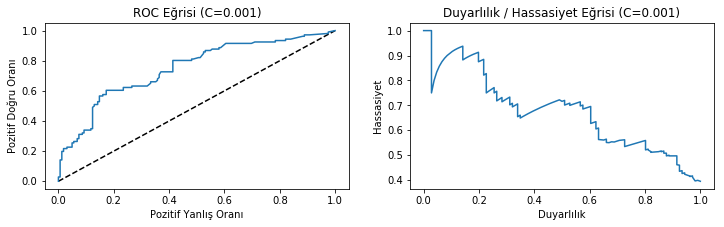

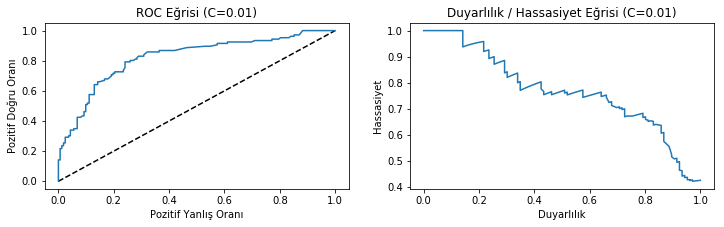

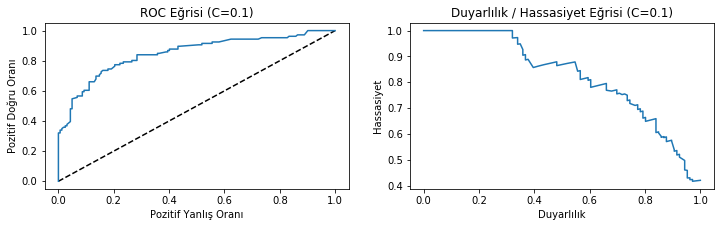

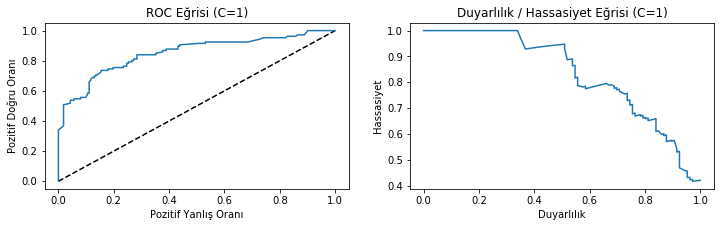

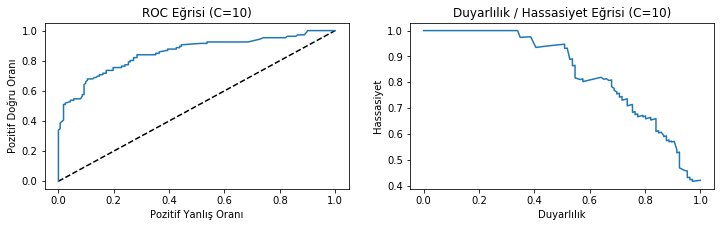

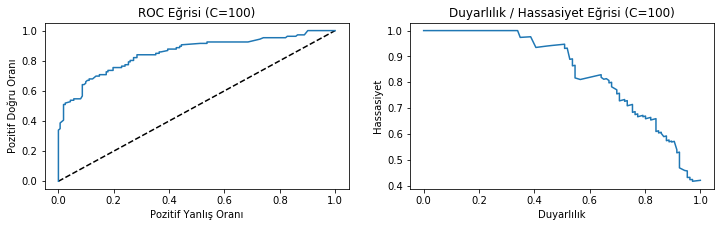

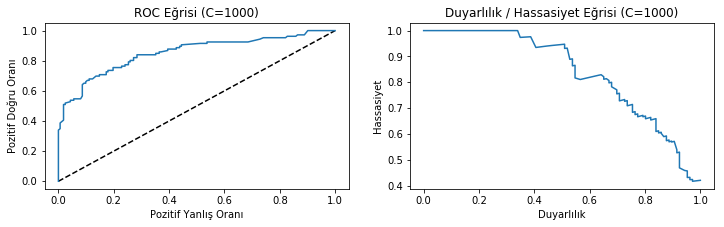

In [88]:
C_degerleri = [0.001,0.01,0.1,1,10,100, 1000]
sira=1

for c in C_degerleri:
    m4_loj_1vsR = LogisticRegression(C = c)
    m4_loj_1vsR.fit(X_eğitim,y_eğitim)
    
    tahmin_test_ihtimal = m4_loj_1vsR.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

    plt.figure(figsize=(12,25))
    plt.subplot(len(C_degerleri),2,sira)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('Pozitif Yanlış Oranı')
    plt.ylabel('Pozitif Doğru Oranı')
    plt.title('ROC Eğrisi (C={})'.format(c))

    plt.subplot(len(C_degerleri),2,sira+1)
    plt.plot(duyarlılık, hassasiyet)
    plt.xlabel('Duyarlılık')
    plt.ylabel('Hassasiyet')
    plt.title('Duyarlılık / Hassasiyet Eğrisi (C={})'.format(c))
    
    sira+=2

plt.show()